# Object spawning

In [1]:
from lxml import etree

function to create and empty world

In [2]:
def create_digital_tree_world(world_name='name'):
    # Create the root element with tag 'sdf' and attribute version='1.6'
    root = etree.Element("sdf", version='1.6')
    
    # Create the 'world' sub-element
    world = etree.SubElement(root, 'world', name=world_name)

    # List of XML fragments to be appended
    xml_strings = [
        """
        <light name='sun' type='directional'>
            <cast_shadows>1</cast_shadows>
            <pose frame=''>0 0 10 0 -0 0</pose>
            <diffuse>1 1 1 1</diffuse>
            <specular>0.2 0.2 0.2 1</specular>
            <attenuation>
                <range>1000</range>
                <constant>0.9</constant>
                <linear>0.01</linear>
                <quadratic>0.001</quadratic>
            </attenuation>
            <direction>-0.5 -0.5 -1</direction>
        </light>
        """,
        """
        <physics name='default_physics' default='0' type='ode'>
            <max_step_size>0.001</max_step_size>
            <real_time_factor>1</real_time_factor>
            <real_time_update_rate>1000</real_time_update_rate>
        </physics>
        """,
        """ 
        <scene>
            <ambient>1 1 1 1</ambient>
            <background>0.0 0.0 0.0 1</background>
            <shadows>0</shadows>
        </scene>
        """,
        """ 
        <spherical_coordinates>
            <surface_model>EARTH_WGS84</surface_model>
            <latitude_deg>0.00</latitude_deg>
            <longitude_deg>0.00</longitude_deg>
            <elevation>0</elevation>
            <heading_deg>0</heading_deg>
        </spherical_coordinates>
        """,
        """ 
        <state world_name='default'>
            <sim_time>203 490000000</sim_time>
            <real_time>168 470627290</real_time>
            <wall_time>1596490486 155571625</wall_time>
            <iterations>167975</iterations>
            <light name='sun'>
                <pose frame=''>0 0 10 0 -0 0</pose>
            </light>
            <light type="directional" name="light1">
                <pose>0 0 50 0 0 0</pose>
                <diffuse>0.5 0.5 0.5 1</diffuse>
                <specular>1 1 1 0</specular>
                <direction>1 0 0.5</direction>
            </light>
         
            <model name='digital_tree'>
                <pose frame=''>0 0 0 0 0 1.57</pose>
                <scale>1 1 1</scale>
                <link name='digital_tree_link'>
                <!-- TO MODIFY THE POSITION OF THE OBJ ON THE LOCAL MAP USE THIS POSE -->
                <pose frame=''> 0 0 0 0 0 3.14</pose>
                <velocity>0 0 0 0 0 0</velocity>
                <acceleration>0 0 0 0 0 0</acceleration>
                <wrench>0 0 0 0 -0 0</wrench>
                </link>
            </model>
        </state>
        """,
        """ 
        <gui fullscreen='0'>
            <camera name='user_camera'>
                <pose frame=''>0 5 1 0 0 -1.57</pose>
                <view_controller>orbit</view_controller>
                <projection_type>perspective</projection_type>
            </camera>
        </gui>
        """,
        """
        <gravity>0 0 -9.8</gravity>
        """,
        """
        <magnetic_field>6e-06 2.3e-05 -4.2e-05</magnetic_field>
        """,
        """
        <atmosphere type='adiabatic'/>
        """,
        """ 
        <model name='digital_tree'>
                <link name='digital_tree_link'>
                    <pose frame=''>0 0 0 0 -0 0</pose>
                    <inertial>
                    <pose frame=''>0 0 0 0 -0 0</pose>
                    <mass>50</mass>
                    <inertia>
                        <ixx>1000</ixx>
                        <ixy>1000</ixy>
                        <ixz>1000</ixz>
                        <iyy>1000</iyy>
                        <iyz>1000</iyz>
                        <izz>1000</izz>
                    </inertia>
                    </inertial>
                    <collision name='digital_tree_link_collision'>
                    <pose frame=''>0 0 0 0 -0 0</pose>
                    <geometry>
                        <mesh>
                        <scale>1 1 1</scale>
                        <uri>model://digital_tree/meshes/digital_tree.dae</uri>
                        </mesh>
                    </geometry>
                    <max_contacts>10</max_contacts>
                    <surface>
                        <contact>
                        <ode/>
                        </contact>
                        <bounce/>
                        <friction>
                        <torsional>
                            <ode/>
                        </torsional>
                        <ode/>
                        </friction>
                    </surface>
                    </collision>
                    <visual name='digital_tree_link_visual'>
                    <pose frame=''>0 0 0 0 -0 0</pose>
                    <geometry>
                        <mesh>
                        <scale>1 1 1</scale>
                        <uri>model://digital_tree/meshes/digital_tree.dae</uri>
                        </mesh>
                    </geometry>
                    </visual>
                    <self_collide>0</self_collide>
                    <enable_wind>0</enable_wind>
                    <kinematic>0</kinematic>
                </link>
                <static>1</static>
                <pose frame=''>0 0 0 0 -0 0</pose>
            </model>
        """
    ]

    # Append each XML fragment to the 'world' element
    for xml_string in xml_strings:
        world.append(etree.fromstring(xml_string))

    return root


function to update the world `<state>` tag with the spawned object (apple, tennis ball)

In [86]:
def create_xml_state_model(objID, xyz_up=[0, 0, 0], size=[10, 10, 10], scale=(1, 1, 1)):
  return f"""
          <model name='{objID}'>
            <pose frame=''>0 0 0 0 0 0</pose>
            <size>{size[0]} {size[1]} {size[2]}</size>
            <scale>{scale[0]} {scale[1]} {scale[2]}</scale>
            <link name='{objID}_link'>
              <!-- TO MODIFY THE POSITION OF THE OBJ ON THE LOCAL MAP USE THIS POSE -->
              <pose frame=''> {xyz_up[0]} {xyz_up[1]} {xyz_up[2]} 0 0 0</pose>
              <velocity>0 0 0 0 0 0</velocity>
              <acceleration>0 0 0 0 0 0</acceleration>
              <wrench>0 0 0 0 -0 0</wrench>
            </link>
          </model>"""

function to update the digital tree

In [4]:
def obj_scale(size=(1, 1, 1)):
    
    x_model = 0.060  # model size x
    y_model = 0.060  # model size y
    z_model = 0.060  # model size z

    k_x = round(size[0] / x_model, 2)
    k_y = round(size[1] / y_model, 2)
    k_z = round(size[2] / z_model, 2)

    return (k_x, k_y, k_z)

In [87]:
def update_tree_model(objID, ObjTag, size, mass, rgba=(0.51, 0.75, 0, 1)):

    # object find the key the use model item
    meshes_collection = {
    'Tennis_ball' : '//tennis_ball/meshes/TennisBall.dae',
    'Apple' : '//apple/meshes/apple.dae'
    }
    
    return f"""
            <model name='{objID}'>
                <link name='{objID}_link'>
                    <pose frame=''>0 0 0 0 -0 0</pose>
                    <inertial>
                    <pose frame=''>0 0 0 0 -0 0</pose>
                    <mass>{mass}</mass>
                    <inertia>
                        <ixx>1000</ixx>
                        <ixy>1000</ixy>
                        <ixz>1000</ixz>
                        <iyy>1000</iyy>
                        <iyz>1000</iyz>
                        <izz>1000</izz>
                    </inertia>
                    </inertial>
                    <collision name='{objID}_link_collision'>
                    <pose frame=''>0 0 0 0 -0 0</pose>
                    <geometry>
                        <mesh>
                        <scale>1 1 1</scale>
                        <size>{size[0]} {size[1]} {size[2]}</size>
                        <uri>model:{meshes_collection[ObjTag]}</uri>
                        </mesh>
                    </geometry>
                    <max_contacts>10</max_contacts>
                    <surface>
                        <contact>
                        <ode/>
                        </contact>
                        <bounce/>
                        <friction>
                        <torsional>
                            <ode/>
                        </torsional>
                        <ode/>
                        </friction>
                    </surface>
                    </collision>
                    <visual name='{objID}_link_visual'>
                    <pose frame=''>0 0 0 0 -0 0</pose>
                    <geometry>
                        <mesh>
                        <size>{size[0]} {size[1]} {size[2]}</size>
                        <scale>1 1 1</scale>
                        <uri>model:{meshes_collection[ObjTag]}</uri>
                        </mesh>
                    </geometry>
                    <material>
                        <ambient>{rgba[0]} {rgba[1]} {rgba[2]} {rgba[3]}</ambient>
                        <diffuse>0.7 0.9 0 1</diffuse>
                        <specular>0.2 0.2 0.2 64</specular>
                        <emissive>0.1 0 0.1 1</emissive>
                    </material>
                    </visual>
                    <self_collide>0</self_collide>
                    <enable_wind>0</enable_wind>
                    <kinematic>0</kinematic>
                </link>
                <static>1</static>
                <pose frame=''>0 0 0 0 -0 0</pose>
            </model>
            """

# Feature extraction

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import cv2
import os

In [7]:
# Set Pandas display options to show all columns and rows while printing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

importing the round truthing data

In [8]:
GROUND_TRUTH_DF = pd.read_csv('../data/ground_truth_data.csv')
GROUND_TRUTH_DF = GROUND_TRUTH_DF.set_index('item')
GROUND_TRUTH_DF

,0_0_id,0_0_setup,0_0_d1,0_0_d2,0_0_position,0_0_x,0_0_level,0_0_y,0_0_ydef,0_0_z,0_0_zdef,0_0_camh1,1_1_id,1_1_setup,1_1_d1,1_1_d2,1_1_h,1_1_w,1_1_position,1_1_x,1_1_level,1_1_y,1_1_ydef,1_1_z,1_1_zdef,1_1_camh1,1_2_id,1_2_setup,1_2_d1,1_2_d2,1_2_h,1_2_w,1_2_position,1_2_x,1_2_level,1_2_y,1_2_ydef,1_2_z,1_2_zdef,1_2_camh1,1_3_id,1_3_setup,1_3_d1,1_3_d2,1_3_h,1_3_w,1_3_position,1_3_x,1_3_level,1_3_y,1_3_ydef,1_3_z,1_3_zdef,1_3_camh1,1_4_id,1_4_setup,1_4_d1,1_4_d2,1_4_h,1_4_w,1_4_position,1_4_x,1_4_level,1_4_y,1_4_ydef,1_4_z,1_4_zdef,1_4_camh1,1_5_id,1_5_setup,1_5_d1,1_5_d2,1_5_h,1_5_w,1_5_position,1_5_x,1_5_level,1_5_y,1_5_ydef,1_5_z,1_5_zdef,1_5_camh1,1_6_id,1_6_setup,1_6_d1,1_6_d2,1_6_h,1_6_w,1_6_position,1_6_x,1_6_level,1_6_y,1_6_k,1_6_ydef,1_6_z,1_6_j,1_6_zdef,1_6_camh1,2_1_id,2_1_setup,2_1_d1,2_1_d2,2_1_position,2_1_x,2_1_level,2_1_y,2_1_ydef,2_1_z,2_1_zdef,2_1_camh1,2_1_camh2,2_1_camh3,2_2_id,2_2_setup,2_2_d1,2_2_d2,2_2_h,2_2_w,2_2_position,2_2_x,2_2_level,2_2_y,2_2_ydef,2_2_z,2_2_zdef,2_2_camh1,2_2_camh2,2_2_camh3
item,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Tb,2d,65.60,65.60,L,-500.0,1.0,2000.0,1887.00,1516.0,1443.0,1100.0,1.0,2d,69.09,67.14,59.79,143.5971,L,-500.0,1.0,2000.0,1887.0,1516.0,1443.0,1100.0,16.0,2d,57.18,57.59,52.25,91.8415,L,-500.0,1.0,2000.0,1892.0,1516.0,1448.0,1100.0,31.0,2d,48.45,49.16,41.80,54.7851,L,-500.0,1.0,2000.0,1897.0,1516.0,1453.0,1100.0,31.0,2d,48.45,49.16,41.80,54.7851,L,-500.0,1.0,2000.0,1897.0,1516.0,1453.0,1100.0,Tb,2d,65.178929,NaN,NaN,NaN,L,-500.0,1.0,2000.0,1887.0,1516.0,1443.0,1100.0,Tb,3d,65.178929,NaN,NaN,NaN,L,-500,1,2000,-80,1920,1516,-40,1476,1100,Tb,2d,64.44,64.81,L,-200.0,2.0,1700.0,1588.0,NaN,NaN,1100.0,1600.0,1850.0,9.0,2d,64.86,59.94,58.18,117.0969,L,-200.0,2.0,1700.0,1590.0,NaN,NaN,1100.0,1600.0,1850.0
2,Tb,2d,65.60,65.60,M,0.0,1.0,2000.0,1887.00,1516.0,1443.0,1100.0,2.0,2d,64.63,62.05,53.76,113.0503,M,0.0,1.0,2000.0,1890.0,1516.0,1446.0,1100.0,17.0,2d,59.32,56.85,50.77,89.3403,M,0.0,1.0,2000.0,1892.0,1516.0,1448.0,1100.0,32.0,2d,47.31,47.22,40.08,50.5211,M,0.0,1.0,2000.0,1898.0,1516.0,1454.0,1100.0,24.0,2d,59.86,55.96,52.34,89.8144,M,0.0,1.0,2000.0,1892.0,1516.0,1448.0,1100.0,24,2d,59.860000,55.96,52.34,89.8144,M,0.0,1.0,2000.0,1892.0,1516.0,1448.0,1100.0,24,3d,59.860000,55.96,52.34,89.8144,M,0,1,2000,-80,1875,1516,-40,1431,1100,Tb,2d,65.60,64.49,M,0.0,2.0,1700.0,1587.0,NaN,NaN,1100.0,1600.0,1850.0,15.0,2d,64.18,63.25,55.56,118.0496,M,0.0,2.0,1700.0,1590.0,NaN,NaN,1100.0,1600.0,1850.0
3,Tb,2d,65.60,65.60,R,500.0,1.0,2000.0,1887.00,1516.0,1443.0,1100.0,3.0,2d,69.87,68.44,63.17,157.5844,R,500.0,1.0,2000.0,1886.0,1516.0,1442.0,1100.0,18.0,2d,59.79,57.79,51.98,92.6670,R,500.0,1.0,2000.0,1892.0,1516.0,1448.0,1100.0,33.0,2d,47.92,46.56,46.39,55.0991,R,500.0,1.0,2000.0,1897.0,1516.0,1453.0,1100.0,6.0,2d,61.15,55.79,52.43,102.3003,R,500.0,1.0,2000.0,1892.0,1516.0,1448.0,1100.0,6,2d,61.150000,55.79,52.43,102.3003,R,500.0,1.0,2000.0,1892.0,1516.0,1448.0,1100.0,6,3d,61.150000,55.79,52.43,102.3003,R,500,1,2000,-80,1869,1516,-40,1425,1100,Tb,2d,64.92,65.42,R,200.0,2.0,1700.0,1587.0,NaN,NaN,1100.0,1600.0,1850.0,13.0,2d,62.84,61.24,55.47,108.4723,R,200.0,2.0,1700.0,1590.0,NaN,NaN,1100.0,1600.0,1850.0
4,Tb,2d,65.35,65.81,L,-500.0,2.0,1700.0,1587.00,1516.0,1443.0,1100.0,4.0,2d,65.08,63.17,58.31,130.6012,L,-500.0,2.0,1700.0,1589.0,1516.0,1445.0,1100.0,19.0,2d,57.87,57.12,52.73,89.9402,L,-500.0,2.0,1700.0,1592.0,1516.0,1448.0,1100.0,34.0,2d,50.74,51.59,45.33,66.2254,L,-500.0,2.0,1700.0,1595.0,1516.0,1451.0,1100.0,12.0,2d,64.36,61.15,55.79,109.5162,L,-500.0,2.0,1700.0,1590.0,1516.0,1446.0,1100.0,12,2d,64.360000,61.15,55.79,109.5162,L,-500.0,2.0,1700.0,1590.0,1516.0,1446.0,1100.0,12,3d,64.360000,61.15,55.79,109.5162,L,-500,2,1700,-80,1565,1516,-40,1421,1100,Tb,2d,64.20,64.63,L,-200.0,3.0,1400.0,1288.0,NaN,NaN,1100.0,1600.0,1850.0,12.0,2d,64.36,61.15,55.79,109.5162,L,-200.0,3.0,1400.0,1290.0,NaN,NaN,1100.

In [9]:
GROUND_TRUTH_ATTRIBUTES = GROUND_TRUTH_DF.columns  # get the data attributes

In [10]:
IMG2D_PATH = '../data/2D'
IMG3D_PATH = '../data/3D'

In [11]:
def depth_to_point_cloud(depth_image, rgb_image, intrinsics):

    # image shape
    H, W = depth_image.shape

    '''
    Intrinsic camera matrix for the raw (distorted) images.
        [fx  0 ppx]
    K = [ 0 fy ppy]
        [ 0  0  1]
    Projects 3D points in the camera coordinate frame to 2D pixel
    coordinates using the focal lengths (fx, fy) and principal point
    (cx, cy).
    '''

    # Parametri intrinseci
    f_x, f_y = intrinsics['f_x'], intrinsics['f_y']    
    ppx, ppy = intrinsics['ppx'], intrinsics['ppy']

    # Crea una meshgrid delle coordinate dei pixel
    u, v = np.meshgrid(np.arange(W), np.arange(H))

    # replace 0 with np.nan to avoid errors
    depth_image = np.where(depth_image == 0, np.nan, depth_image)

    # Calcola le coordinate 3D
    X = (u - ppx) / f_x * depth_image
    Y = (v - ppy) / f_y * depth_image
    Z = depth_image


    # Impila le coordinate X, Y, Z
    points = np.stack((X, Y, Z), axis=-1).reshape(-1, 3)

    # Ottieni i valori RGB
    rgb_values = rgb_image.reshape(-1, 3)

    # Combina coordinate e colori in un unico array
    point_cloud = np.hstack((points, rgb_values))


    # reshape the data to have x, y values to navigate the channel values:
    # -  x[mm] (with respect to center of the frame)
    # -  y[mm]
    # -  z[mm]
    # -  red
    # -  green
    # -  blue
    point_cloud2 = point_cloud.reshape((depth_image.shape[0], depth_image.shape[1], len(point_cloud[0])))
  
    return point_cloud2

In [12]:
def shift_pointcloud_origin(point_cloud, xy_origin):
    H, W, _ = point_cloud.shape

    X = point_cloud[:, :, 0]
    Y = point_cloud[:, :, 1]
    Z = point_cloud[:, :, 2]

    # define actual origin coordinates
    Ox = point_cloud[xy_origin[1], xy_origin[0], 0]
    Oy = point_cloud[xy_origin[1], xy_origin[0], 1]
    Oz = point_cloud[xy_origin[1], xy_origin[0], 2]

    # shift the origin
    S = np.array([[1, 0, 0, -Ox],
                 [0, 1, 0, -Oy],
                 [0, 0, 1, -Oz],
                 [0, 0, 0, 1]])
    
    homogeneous_coords = np.stack((X, Y, Z, np.ones_like(X)), axis=-1)
    
    # Reshape to (N, 4) where N = height * width
    homogeneous_coords = homogeneous_coords.reshape(-1, 4)
    # Apply the transformation matrix S
    points_transformed = np.dot(S, homogeneous_coords.T).T
    # Reshape back to the original shape
    points_transformed = points_transformed.reshape(H, W, 4)
    # Extract the transformed X, Y, Z coordinates
    point_cloud[:, :, 0] = points_transformed[:, :, 0]
    point_cloud[:, :, 1] = points_transformed[:, :, 1]
    point_cloud[:, :, 2] = points_transformed[:, :, 2]
    
    return point_cloud

In [13]:
def flip_pointcloud_coords(point_cloud):

    H, W, _ = point_cloud.shape

    X = point_cloud[:, :, 0]
    Y = point_cloud[:, :, 1]
    Z = point_cloud[:, :, 2]

    # shift the origin
    S = np.array([[1, 0, 0, 0],
                [0, -1, 0, 0],
                [0, 0, -1, 0],
                [0, 0, 0, 1]])
    
    # Prepare the point cloud for transformation by adding a column of ones for homogeneous coordinates
    XYZ_coords = np.stack((X, Y, Z, np.ones_like(X)), axis=-1)
    
    # Reshape to (N, 4) where N = H * W
    XYZ_coords = XYZ_coords.reshape(-1, 4)
    
    # Apply the transformation matrix S
    points_transformed = np.dot(XYZ_coords, S.T)
    
    # Reshape back to the original shape
    points_transformed = points_transformed.reshape(H, W, 4)

    # Extract the transformed X, Y, Z coordinates
    point_cloud[:, :, 0] = points_transformed[:, :, 0]
    point_cloud[:, :, 1] = points_transformed[:, :, 1]
    point_cloud[:, :, 2] = points_transformed[:, :, 2]

    return point_cloud

In [14]:
# manhattan

def manhattan_distance(xyz_up_ref, xyz_up_estimated):
    '''
    It takes input coordinates in meters
    return error in meters
    '''
    def apply_resolution(array, resolution):
        # Round each element in the array to the nearest multiple of the resolution
        return np.round(array, resolution)
    
       
    # Apply the resolution to the second array
    xyz_up_ref = apply_resolution(xyz_up_ref, 2)
    xyz_up_estimated = apply_resolution(xyz_up_estimated, 2)

    # compute distance
    x_e = np.abs(xyz_up_estimated[0] - xyz_up_ref[0]) 
    y_e = np.abs(xyz_up_estimated[1] - xyz_up_ref[1])
    z_e = np.abs(xyz_up_estimated[2] - xyz_up_ref[2])

    
    return np.sum([x_e, y_e, z_e])

In [15]:
# euclidean

def euclidean_distance(xyz_up_ref, xyz_up_estimated):
    '''
    It takes input coordinates in meters
    return error in meters
    '''

    def apply_resolution(array, resolution):
        # Round each element in the array to the nearest multiple of the resolution
        return np.round(array, resolution)
    
       
    # Apply the resolution to the second array
    xyz_up_ref = apply_resolution(xyz_up_ref, 2)
    xyz_up_estimated = apply_resolution(xyz_up_estimated, 2)

    # compute distance
    x_e = (xyz_up_estimated[0] - xyz_up_ref[0]) **2
    y_e = (xyz_up_estimated[1] - xyz_up_ref[1]) **2
    z_e = (xyz_up_estimated[2] - xyz_up_ref[2]) **2

    return np.sqrt(np.sum(np.array([x_e, y_e, z_e])))


In [16]:
def get_rgba_color(matrix: np.ndarray, ObjTag):
    # color dict
    # for the tag Tennis ball give bacck rgba (0.51, 0.75, 0, 1) 
    if ObjTag != 'Tennis_ball':
        # convert to rgba
        rgba_mat = cv2.cvtColor(matrix, cv2.COLOR_RGB2RGBA).astype('float64')
        rgba_mat /= 255.

        h, w, _ = rgba_mat.shape
        x = w//2
        y = h//2
        
        return np.nanmedian(rgba_mat[y - h //6 : y + h //6, 
                x - w //6 : x + w//6], axis=(0, 1))
    
    else: return [1., 1., 0, 1]


In [88]:

def digital_twin(root, world_name=None, ObjID=None, ObjTag=None, xyz_up=[1,1,1], size=[10,10,10], mass=10, rgba_color=[.5, 0.5, 0.5, 1.]):

    # Find the 'state' tag
    state = root.find('.//state')
    model = root.find('world')

    # get scaling factors
    scale = obj_scale(size)

    # init the object in the digital twin
    new_state_model_string = create_xml_state_model(ObjID, xyz_up=xyz_up, size=size, scale=scale)    
    new_state_model_element = etree.fromstring(new_state_model_string)

    # Add the object model element to the root element
    state.append(new_state_model_element)

    # new model - updatecolor features
    model_str = update_tree_model(ObjID, ObjTag, size, mass, rgba_color)
    model_element = etree.fromstring(model_str)
    # print(model_str)

    model.append(model_element)  # add th eobject to the digital tree

    # Create an ElementTree from the root element
    tree = etree.ElementTree(root)

    # Write the modified XML back to a file
    with open(f'../worlds/digital_tree_{world_name}.world', 'wb') as f:
        tree.write(f, pretty_print=True, encoding='utf-8', xml_declaration=True)

In [89]:
def digital_twin_estimated(root, world_name=None, ObjID=None, ObjTag=None, xyz_up=[1,1,1], size=[10,10,10], mass=10, rgba_color=[.5, 0.5, 0.5, 1.]):

    # Find the 'state' tag
    state = root.find('.//state')
    model = root.find('world')

    # get scaling factors
    scale = obj_scale(size)

    # init the object in the digital twin
    new_state_model_string = create_xml_state_model(ObjID, xyz_up=xyz_up, size=size, scale=scale)    
    new_state_model_element = etree.fromstring(new_state_model_string)

    # Add the object model element to the root element
    state.append(new_state_model_element)

    # new model - updatecolor features
    model_str = update_tree_model(ObjID, ObjTag, size, mass, rgba_color)
    model_element = etree.fromstring(model_str)
    # print(model_str)

    model.append(model_element)  # add th eobject to the digital tree

    # Create an ElementTree from the root element
    tree = etree.ElementTree(root)

    # Write the modified XML back to a file
    with open(f'../worlds/digital_tree_{world_name}_estimated.world', 'wb') as f:
        tree.write(f, pretty_print=True, encoding='utf-8', xml_declaration=True)

In [90]:

def digital_twin_real(root, world_name=None, ObjID=None, ObjTag=None, xyz_up=[1,1,1], size=[10,10,10], mass=10, rgba_color=[.5, 0.5, 0.5, 1.]):

    # Find the 'state' tag
    state = root.find('.//state')
    model = root.find('world')

    # get scaling factors
    scale = obj_scale(size)

    # init the object in the digital twin
    new_state_model_string = create_xml_state_model(ObjID, xyz_up=xyz_up, size=size, scale=scale)    
    new_state_model_element = etree.fromstring(new_state_model_string)

    # Add the object model element to the root element
    state.append(new_state_model_element)

    # new model - updatecolor features
    model_str = update_tree_model(ObjID, ObjTag, size, mass, rgba_color)
    model_element = etree.fromstring(model_str)
    # print(model_str)

    model.append(model_element)  # add th eobject to the digital tree

    # Create an ElementTree from the root element
    tree = etree.ElementTree(root)

    # Write the modified XML back to a file
    with open(f'../worlds/digital_tree_{world_name}_ref.world', 'wb') as f:
        tree.write(f, pretty_print=True, encoding='utf-8', xml_declaration=True)

In [18]:
def gazebo_transfomration_matrix(xyz_up):
    ''' 
    params:
        xyz_up = np.ndarray vector
    ''' 

    xyz_up = np.append(xyz_up, 1)
    

    # get opposite directions for gazebo
    rotateMatrix = np.array([(-1, 0, 0, 0), 
                             (0, 1, 0, 0), 
                             (0, 0, 1, 0), 
                             (0, 0, 0, 1)])

    # merge transofrmation matrices (shift, rotation)
    endMatrix = np.dot(xyz_up, rotateMatrix)
    
    return endMatrix[0:3]

In [78]:
def obj_shift(position, size):
    def getSign(position):
        v = np.where(np.array(position) < -np.average(size), -1, 1)
        v = np.where((position > -np.average(size)) & (position < np.average(size)), 0, v)
        return v

    # make movement based on position 
    sign = getSign(position)
    size = np.multiply(sign, np.array(size))
    # shifting matrix - half of th eobject size
    m = np.array([[-1, 0, 0, size[0]/2],
                [0, 1, 0, -size[1]/2],
                [0, 0, 1, -size[2]/2],
                [0, 0, 0, 0]])

    # m = np.array([[-1, 0, 0, size[0]/2],
    #             [0, 1, 0, size[1]/2],
    #             [0, 0, 1, 0],
    #             [0, 0, 0, 0]])

    # homogeneous coordinate
    v = np.append(np.array(position), 1)

    return np.dot(m, v)[0:3]

### v.1.0.0

world_name= '2D_3_1_2_1'
world_name= '2D_3_1_3_0'
world_name= '2D_3_1_3_1'
world_name= '2D_3_1_4_0'
world_name= '2D_3_1_4_1'
world_name= '2D_3_1_5_0'
world_name= '2D_3_1_2_0'
world_name= '2D_1_1_1_0'
world_name= '2D_1_1_1_1'
world_name= '2D_1_1_2_0'
world_name= '2D_1_1_2_1'
world_name= '2D_1_1_3_0'
world_name= '2D_1_1_3_1'
world_name= '2D_1_1_4_0'
world_name= '2D_1_1_4_1'
world_name= '2D_1_1_5_0'
world_name= '2D_2_1_1_0'
world_name= '2D_2_1_1_1'
world_name= '2D_2_1_2_0'
world_name= '2D_2_1_2_1'
world_name= '2D_2_1_3_0'
world_name= '2D_2_1_3_1'
world_name= '2D_2_1_4_0'
world_name= '2D_2_1_4_1'
world_name= '2D_2_1_5_0'
world_name= '2D_3_1_1_0'
world_name= '2D_3_1_1_1'
world_name= '3D_1_1_6_0'
world_name= '3D_1_1_6_1'
world_name= '3D_2_1_6_0'
world_name= '3D_2_1_6_1'
world_name= '3D_3_1_6_0'
world_name= '3D_3_1_6_1'
world_name= '3D_4_1_6_0'
world_name= '3D_4_1_6_1'
world_name= '3D_5_1_6_0'
world_name= '3D_5_1_6_1'
world_name= '3D_6_1_6_0'
world_name= '3D_6_1_6_1'


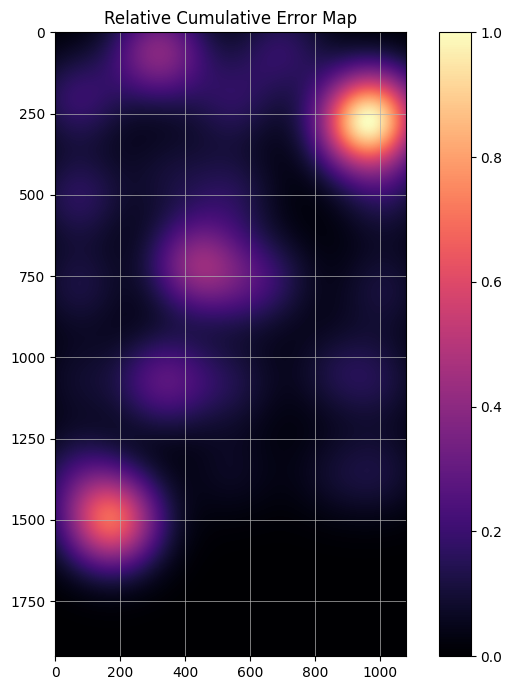

In [24]:
DELTA_TRUNK_POSITION_FROM_SOIL = 127  #mm

# export dataframe
df = pd.DataFrame(columns=['image', 'setup', 'Trunk-Cam_dist[mm]', 'ObjType', 'Position', 'Xgt[m]', 'Ygt[m]', 'Zgt[m]', 'Xestimated[m]', 'Yestimated[m]', 'Zestimated[m]', 'Manhattan[m]', 'Euclidean[m]'])
objects = 0

# error image
error_img = np.zeros((1920, 1080)) 

for folder in [IMG2D_PATH, IMG3D_PATH]:
        for subfolder in os.listdir(os.path.join(os.getcwd(), folder )):

                world_name = f'{os.path.basename(folder)}_{subfolder}'
                print(f'{world_name= }')

                # Init the digital twin
                root = create_digital_tree_world(world_name=f'{world_name}' )

                files = os.listdir(os.path.join(os.getcwd(), folder , subfolder))
                
                # pre-set varibale
                image_orientation = None

                # get col mat
                col_file = [file for file in files if file.find('color') != -1][0]
                # open color matrix
                im_rgb = cv2.imread(os.path.join(folder, subfolder, col_file))[:,:,::-1]  # RGB [8-bit]


                # get depth mat
                depth_file = [file for file in files if file.find('depth') != -1][0]
                # open depth matrix
                depth_file = os.path.join(folder, subfolder, depth_file)
                im_depth = cv2.imread(depth_file, cv2.IMREAD_ANYDEPTH)  # grayscale [mm]

                # get json annnot
                annot_file = [file for file in files if file.find('annot') != -1][0]
                # open the annotation file
                annot_file = os.path.join(folder, subfolder, annot_file)
                # open the json_file
                with open(annot_file, 'r') as json_file:
                        annot = json.load(json_file)
            

                # --- METADATA ---

                # from the image name get the trial and repetition code -- this is needed to access the ground truth data
                color_fn_split = str(col_file).split('_')

                trial_code = f'{color_fn_split[1]}_{color_fn_split[2]}'
                
                # SET CAMERA CARACTERISTICS FOR PIXELS RESOLUTION
                W = im_rgb.shape[1]
                H = im_rgb.shape[0]
                if im_rgb.shape[0] < im_rgb.shape[1]:
                        image_orientation = 'H'
                        HFOV = 69
                        VFOV = 42
                        
                else:
                        image_orientation = 'V'
                        HFOV = 42
                        VFOV = 69
                       

                # -- PROCESSING ---

               
                # 1. get trunk location and distance form the camera


                trunk_pos = None
                trunk_data = {'origin' : None, 'tl' : [], 'br' : []}
                while trunk_pos == None:
                        for Obj in annot['objects']:

                                # object type
                                ObjType = Obj['classTitle']

                                if ObjType == 'Trunk':
                                        # object absolute coordinates
                                        Trunk_absCoords_list = Obj['points']['exterior']
                                        
                                        # split into TL and BR
                                        trunk_tl, trunk_br = Trunk_absCoords_list

                                        trunk_data['tl'] = trunk_tl
                                        trunk_data['br'] = trunk_br

                                        if image_orientation == 'H':
                                               pass
                                        else:
                                               trunk_data['origin'] = (int(trunk_data['tl'][0]), trunk_data['br'][1])  # pixels
                                        trunk_pos = True
                                        break
                
                # get the trunk-camera distance
                trunk_cam_dist_mm = np.nanmedian(im_depth[trunk_data['tl'][1] : trunk_data['br'][1],
                                        trunk_data['tl'][0] : trunk_data['br'][0]])
                
                pix_res_mm = np.sqrt((4 * trunk_cam_dist_mm**2 * np.tan(np.deg2rad(VFOV)/2) * np.tan(np.deg2rad(HFOV) / 2))/ (H * W))  # mm/pix

                # print(f'{trunk_cam_dist_mm= } | {pix_res_mm= }')

                

                # 2. process each hang object

                for ind,  Obj in enumerate(annot['objects']):

                        if Obj['classTitle'] != 'Trunk':

                                # obj position
                                ObjPosition = Obj['description']
                                # print(f'{ObjPosition= }')

                                # object type
                                ObjTag = Obj['classTitle']
                                # print(f'{ObjTag= }')


                                # object absolute coordinates [x, y]
                                tl, br = Obj['points']['exterior']

                                # print(f'\n{ObjTag= } - {ObjPosition}')

                                # get object related gtruthing data as a series
                                bbox_gtruth = GROUND_TRUTH_DF.loc[int(ObjPosition), :]

                                # get ground truthing attributes related to the specific trial-repetition
                                attributes = [attr for attr in bbox_gtruth.index if attr.find(trial_code) != -1]

                                # object-related df
                                bbox_gtruth = bbox_gtruth.loc[attributes].copy()

                                ''' 
                                REFERENCE POSITION (XYZ)gt
                                '''
                                x_gt = bbox_gtruth.loc[f'{trial_code}_x'] / 1000  # proper x [m]
                                # TODO: is 'def' the right attribute?
                                y_gt = bbox_gtruth.loc[f'{trial_code}_ydef'] / 1000 # height [m]
                                z_gt = bbox_gtruth.loc[f'{trial_code}_zdef']  # obj - camera distance [mm]
                                z_gt = (z_gt - trunk_cam_dist_mm) / 1000 # [m]
                                z_gt = 0

                                # CRS change
                                xyz_gt = [x_gt, y_gt, z_gt]

                                # XYZ_up trough trasnformation matrix
                                xyz_up_ref = np.dot(np.array(xyz_gt), [[1, 0, 0], [0, 0, 1], [0, 1, 0]]) 

                                # print(f'[GT] {xyz_gt} --- [UP] {xyz_up_ref}')

                                ''' 
                                POSITION ESTIMATION 
                                '''

                                xc =  int(tl[0] + (br[0] - tl[0]) / 2)  
                                yc =  int(tl[1] + (br[1] - tl[1]) / 2)  

                                w = int((br[0] - tl[0]))
                                h = int((br[1] - tl[1]))


                                # bbox for color estimation
                                bbox_im = im_rgb[yc - h // 2 : yc + h //2, 
                                                xc - w //2 : xc + w//2].copy()
                                
                             

                                # trunk position to normalize the positions
                                trunk_x =  trunk_data['origin'][0]  
                                trunk_y =  trunk_data['origin'][1]  


                                # print('TRUNK: ', trunk_x, trunk_y)
                             
                                # Make relative coordinates 
                                # the trunk is in the bottom of the image
                                x_estimated = xc - trunk_x  # pixels
                                y_estimated = trunk_y - yc # pixels

                                # get obj-camera distance at the center of the bbox
                                obj_cam_dist = np.nanmedian(im_depth[yc - h // 4 : yc + h //4, 
                                                                        xc - w //4 : xc + w//4])  # mm
                                
                                # get pixel resolution in mm
                                # NOTE: to size the fruit is good to use a pixel resolution related to the Obj-camera distance, but when positioning
                                # it should be computerd the pixel_resolution by exploiting the Trunk-camera distance. If this is not done, up to 15mm errors 
                                # occur in the position of fruits

                                # pix_res_mm = np.sqrt((4 * obj_cam_dist**2 * np.tan(np.deg2rad(VFOV)/2) * np.tan(np.deg2rad(HFOV) / 2))/ (H * W))  # mm/pix

                                # position estimation
                                x_estimated= (x_estimated * pix_res_mm) / 1000 # m

                                y_estimated = ((y_estimated * pix_res_mm) + DELTA_TRUNK_POSITION_FROM_SOIL) / 1000 # m

                                # object-trunk distance
                                z_estimated = (trunk_cam_dist_mm - obj_cam_dist) / 1000  # m


                                # collection CRS
                                xyz_estimated = [x_estimated, y_estimated, z_estimated]
                        
                        
                                # XYZ_up trough transformation matrix
                                xyz_up_estimated = np.dot(np.array(xyz_estimated), [[1, 0, 0], [0, 0, 1], [0, 1, 0]]) 

                                # print(f'[UP ref] {xyz_up_ref} --- [UP estimated] {xyz_up_estimated}')


                                # Manhattan
                                manhattan_dist = manhattan_distance(xyz_up_estimated, xyz_up_ref)  # meters

                                # Euclidean
                                euclidean_dist = euclidean_distance(xyz_up_estimated, xyz_up_ref)  # meters

                                # add error
                                error_img[yc - h // 2 : yc + h //2, 
                                        xc - w //2 : xc + w//2] += (manhattan_dist + euclidean_dist )

                                # color
                                rgba_color = get_rgba_color(bbox_im, ObjTag)
                                # print(f'{rgba_color= }')


                                # update dataframe
                                df.loc[objects] = ([col_file, os.path.basename(folder), trunk_cam_dist_mm, ObjTag, ObjPosition, x_gt, y_gt, z_gt, x_estimated, y_estimated, z_estimated, manhattan_dist, euclidean_dist])
                                objects += 1


                                if ObjTag != 'Tennis_ball':
                                        ObjMass = (bbox_gtruth.loc[f'{trial_code}_w'] /1000) / 9.81  # kg

                                        Obj_d1 = bbox_gtruth.loc[f'{trial_code}_d1'] / 1000 # m
                                        Obj_d2 = bbox_gtruth.loc[f'{trial_code}_d2'] / 1000 # m
                                        Obj_h = bbox_gtruth.loc[f'{trial_code}_h'] / 1000 # m
                                        ObjSize = (Obj_d1, Obj_d2, Obj_h)
                                else:
                                        ObjMass = 0.0058

                                        Obj_d1 = bbox_gtruth.loc[f'{trial_code}_d1'] / 1000 # m
                                        Obj_d2 = bbox_gtruth.loc[f'{trial_code}_d1'] / 1000 # m
                                        Obj_h = bbox_gtruth.loc[f'{trial_code}_d1'] / 1000 # m
                                        ObjSize = (Obj_d1, Obj_d2, Obj_h)

                                # transform the coords for the digital twin -- flip X axis
                                xyz_up_estimated = obj_shift(xyz_up_estimated, ObjSize)

                                digital_twin(root, world_name=world_name, ObjID=ObjPosition, ObjTag=ObjTag, xyz_up=xyz_up_estimated, size=ObjSize, mass=ObjMass, rgba_color=rgba_color)
        
# save file
df.to_csv(f'../data/IEEE_2024_positioning_evaluation.csv', index=False)

plt.figure(figsize=(7, 7))
# Apply Gaussian blurring to spread the error throughout the whole image
error_img = cv2.GaussianBlur(error_img, (0, 0), sigmaX=100, sigmaY=100, borderType=cv2.BORDER_REPLICATE)
error_img /= np.max(error_img)


im = plt.imshow(error_img, cmap='magma')
plt.colorbar(im)
plt.grid(lw=.5)
plt.title('Relative Cumulative Error Map')
plt.tight_layout()
plt.savefig('../docs/images/error_map.png', dpi=400)
plt.show()

### V.2.0.0

In [92]:
DELTA_TRUNK_POSITION_FROM_SOIL = 127  #mm
COLOR_CAMERA_INTRINSICS = {'f_x': 1362.53, 'f_y': 1363.27,
                                'ppx': 562.758, 'ppy': 955.758}

# export dataframe
df = pd.DataFrame(columns=['image', 'setup', 'Trunk-Cam_dist[mm]', 'ObjType', 'Position', 'Xgt[m]', 'Ygt[m]', 'Zgt[m]', 'Xestimated[m]', 'Yestimated[m]', 'Zestimated[m]', 'Manhattan[m]', 'Euclidean[m]'])
objects = 0


for folder in [IMG2D_PATH, IMG3D_PATH]:
        for subfolder in os.listdir(os.path.join(os.getcwd(), folder )):

                world_name = f'{os.path.basename(folder)}_{subfolder}'
                print(f'{world_name= }')

                # Init the digital twin
                root_real = create_digital_tree_world(world_name=f'{world_name}' )
                root_estimated = create_digital_tree_world(world_name=f'{world_name}' )

                files = os.listdir(os.path.join(os.getcwd(), folder , subfolder))
                
                # pre-set varibale
                image_orientation = None

                # get col mat
                col_file = [file for file in files if file.find('color') != -1][0]
                # open color matrix
                im_rgb = cv2.imread(os.path.join(folder, subfolder, col_file))[:,:,::-1]  # RGB [8-bit]


                # get depth mat
                depth_file = [file for file in files if file.find('depth') != -1][0]
                # open depth matrix
                depth_file = os.path.join(folder, subfolder, depth_file)
                im_depth = cv2.imread(depth_file, cv2.IMREAD_ANYDEPTH)  # grayscale [mm]

                # get json annnot
                annot_file = [file for file in files if file.find('annot') != -1][0]
                # open the annotation file
                annot_file = os.path.join(folder, subfolder, annot_file)
                # open the json_file
                with open(annot_file, 'r') as json_file:
                        annot = json.load(json_file)
             

                # --- METADATA ---

                # from the image name get the trial and repetition code -- this is needed to access the ground truth data
                color_fn_split = str(col_file).split('_')

                trial_code = f'{color_fn_split[1]}_{color_fn_split[2]}'
                
                # SET CAMERA CARACTERISTICS FOR PIXELS RESOLUTION
                W = im_rgb.shape[1]
                H = im_rgb.shape[0]
                if im_rgb.shape[0] < im_rgb.shape[1]:
                        image_orientation = 'H'
                        HFOV = 69
                        VFOV = 42
                        
                else:
                        image_orientation = 'V'
                        HFOV = 42
                        VFOV = 69
                       

                # -- PROCESSING ---

                # convert to 6channels image with spatial info
                point_cloud = depth_to_point_cloud(im_depth, im_rgb, COLOR_CAMERA_INTRINSICS)

                # 1. get trunk location and distance form the camera

                trunk_pos = None
                trunk_data = {'origin' : None, 'tl' : [], 'br' : []}
                while trunk_pos == None:
                        for Obj in annot['objects']:

                                # object type
                                ObjType = Obj['classTitle']

                                if ObjType == 'Trunk':
                                        # object absolute coordinates
                                        Trunk_absCoords_list = Obj['points']['exterior']
                                        
                                        # split into TL and BR
                                        trunk_tl, trunk_br = Trunk_absCoords_list

                                        trunk_data['tl'] = trunk_tl
                                        trunk_data['br'] = trunk_br

                                        if image_orientation == 'H':
                                               pass
                                        else:
                                               trunk_data['origin'] = (int(trunk_data['tl'][0]), trunk_data['br'][1])  # pixels
                                        trunk_pos = True
                                        break
                
                # get the trunk-camera distance
                trunk_cam_dist_mm = np.nanmedian(im_depth[trunk_data['tl'][1] : trunk_data['br'][1],
                                        trunk_data['tl'][0] : trunk_data['br'][0]])
                
                # pix_res_mm = np.sqrt((4 * trunk_cam_dist_mm**2 * np.tan(np.deg2rad(VFOV)/2) * np.tan(np.deg2rad(HFOV) / 2))/ (H * W))  # mm/pix
                # print(f'{trunk_cam_dist_mm= } | {pix_res_mm= }')

                # shiftato l'origine al tronco
                point_cloud = shift_pointcloud_origin(point_cloud, trunk_data['origin'])
                point_cloud = flip_pointcloud_coords(point_cloud)


                # 2. process each hang object

                for ind,  Obj in enumerate(annot['objects']):

                        if Obj['classTitle'] != 'Trunk':

                                # obj position
                                ObjPosition = Obj['description']
                                # print(f'{ObjPosition= }')

                                # object type
                                ObjTag = Obj['classTitle']
                                # print(f'{ObjTag= }')


                                # object absolute coordinates [x, y]
                                tl, br = Obj['points']['exterior']

                                # print(f'\n{ObjTag= } - {ObjPosition}')

                                # get object related gtruthing data as a series
                                bbox_gtruth = GROUND_TRUTH_DF.loc[int(ObjPosition), :]

                                # get ground truthing attributes related to the specific trial-repetition
                                attributes = [attr for attr in bbox_gtruth.index if attr.find(trial_code) != -1]

                                # object-related df
                                bbox_gtruth = bbox_gtruth.loc[attributes].copy()

                                ''' 
                                REFERENCE POSITION (XYZ)gt
                                '''
                                x_gt = bbox_gtruth.loc[f'{trial_code}_x'] / 1000  # proper x [m]
                                # TODO: is 'def' the right attribute?
                                y_gt = np.round(bbox_gtruth.loc[f'{trial_code}_ydef'] / 1000, 2) # height [m]
                                z_gt = np.round(bbox_gtruth.loc[f'{trial_code}_zdef'], 2) # obj - camera distance [mm]
                                z_gt = (z_gt - trunk_cam_dist_mm) / 1000 # [m]
                                # z_gt = 0

                                # CRS change
                                xyz_gt = [x_gt, y_gt, z_gt]

                                # XYZ_up trough trasnformation matrix
                                xyz_up_ref = np.dot(np.array(xyz_gt), [[1, 0, 0], [0, 0, 1], [0, 1, 0]]) 

                                # print(f'[GT] {xyz_gt} --- [UP] {xyz_up_ref}')

                                ''' 
                                POSITION ESTIMATION 
                                '''

                                xc =  int(tl[0] + (br[0] - tl[0]) / 2)  
                                yc =  int(tl[1] + (br[1] - tl[1]) / 2)  

                                w = int((br[0] - tl[0]))
                                h = int((br[1] - tl[1]))


                                # bbox for color estimation
                                bbox_im = im_rgb[yc - h // 2 : yc + h //2, 
                                                xc - w //2 : xc + w//2].copy()
                                

                                # seek_object_center([xc, yc, w, h], point_cloud, bbox_im)

                                # while True:
                        
                                ''' 
                                [v2.0.0]
                                '''

                                # x_estimated= np.nanmedian(point_cloud[yc - h // 2 : yc + h //2, 
                                #                 xc - w //2 : xc + w//2, 0]) / 1000

                                # y_estimated = (np.nanmedian((point_cloud[yc - h // 2 : yc + h //2, 
                                #                 xc - w //2 : xc + w//2, 1])) + DELTA_TRUNK_POSITION_FROM_SOIL) / 1000 # m

                                # # object-trunk distance
                                # z_estimated = np.nanmedian(point_cloud[yc - h // 2 : yc + h //2, 
                                #                 xc - w //2 : xc + w//2, 2]) / 1000  # m
                                
                                x_estimated= np.round(point_cloud[yc, xc, 0] / 1000, 1)

                                y_estimated = np.round((point_cloud[yc, xc, 1]  + DELTA_TRUNK_POSITION_FROM_SOIL) / 1000, 2) # m

                                # object-trunk distance
                                z_estimated = np.round(point_cloud[yc, xc, 2] / 1000 , 2) # m
                                
                                # collection CRS
                                xyz_estimated = [x_estimated, y_estimated, z_estimated]


                                # XYZ_up trough transformation matrix
                                xyz_up_estimated = np.dot(np.array(xyz_estimated), [[1, 0, 0], [0, 0, 1], [0, 1, 0]]) 

                                # print(f'[UP ref] {xyz_up_ref} --- [UP estimated] {xyz_up_estimated}')

                                # color
                                rgba_color = get_rgba_color(bbox_im, ObjTag)
                                # print(f'{rgba_color= }')


                                if ObjTag != 'Tennis_ball':
                                        ObjMass = (bbox_gtruth.loc[f'{trial_code}_w'] /1000) / 9.81  # kg

                                        Obj_d1 = bbox_gtruth.loc[f'{trial_code}_d1'] / 1000 # m
                                        Obj_d2 = bbox_gtruth.loc[f'{trial_code}_d2'] / 1000 # m
                                        Obj_h = bbox_gtruth.loc[f'{trial_code}_h'] / 1000 # m
                                        ObjSize = (Obj_d1, Obj_d2, Obj_h)
                                else:
                                        ObjMass = 0.0058

                                        Obj_d1 = bbox_gtruth.loc[f'{trial_code}_d1'] / 1000 # m
                                        Obj_d2 = bbox_gtruth.loc[f'{trial_code}_d1'] / 1000 # m
                                        Obj_h = bbox_gtruth.loc[f'{trial_code}_d1'] / 1000 # m
                                        ObjSize = (Obj_d1, Obj_d2, Obj_h)


                                # transform the coords for the digital twin -- flip X axis
                                xyz_up_estimated = obj_shift(xyz_up_estimated, ObjSize)
                                xyz_up_ref = obj_shift(xyz_up_ref, ObjSize)

                                xyz_up_ref = np.round(np.dot(np.array(xyz_up_ref), [[1, 0, 0], [0, -1, 0], [0, 0, 1]]), 3)
                                xyz_up_estimated = np.round(xyz_up_estimated, 3)


                                digital_twin_estimated(root_estimated, world_name=world_name, ObjID=ObjPosition, ObjTag=ObjTag, xyz_up=xyz_up_estimated, size=ObjSize, mass=ObjMass, rgba_color=rgba_color)
                                digital_twin_real(root_real, world_name=world_name, ObjID=ObjPosition, ObjTag=ObjTag, xyz_up=xyz_up_ref, size=ObjSize, mass=ObjMass, rgba_color=rgba_color)

                                # Manhattan
                                manhattan_dist = manhattan_distance(xyz_up_estimated, xyz_up_ref)  # meters

                                # Euclidean
                                euclidean_dist = euclidean_distance(xyz_up_estimated, xyz_up_ref)  # meters


                                # update dataframe
                                df.loc[objects] = ([col_file, os.path.basename(folder), trunk_cam_dist_mm, ObjTag, ObjPosition, 
                                                                                xyz_up_ref[0], xyz_up_ref[1], xyz_up_ref[2], 
                                                                                xyz_up_estimated[0], xyz_up_estimated[1], xyz_up_estimated[2], 
                                                                                manhattan_dist, euclidean_dist])
                                objects += 1


# save file
df.to_csv(f'../data/IEEE_2024_positioning_evaluation.csv', index=False)

world_name= '2D_3_1_2_1'
world_name= '2D_3_1_3_0'
world_name= '2D_3_1_3_1'
world_name= '2D_3_1_4_0'
world_name= '2D_3_1_4_1'
world_name= '2D_3_1_5_0'
world_name= '2D_3_1_2_0'
world_name= '2D_1_1_1_0'
world_name= '2D_1_1_1_1'
world_name= '2D_1_1_2_0'
world_name= '2D_1_1_2_1'
world_name= '2D_1_1_3_0'
world_name= '2D_1_1_3_1'
world_name= '2D_1_1_4_0'
world_name= '2D_1_1_4_1'
world_name= '2D_1_1_5_0'
world_name= '2D_2_1_1_0'
world_name= '2D_2_1_1_1'
world_name= '2D_2_1_2_0'
world_name= '2D_2_1_2_1'
world_name= '2D_2_1_3_0'
world_name= '2D_2_1_3_1'
world_name= '2D_2_1_4_0'
world_name= '2D_2_1_4_1'
world_name= '2D_2_1_5_0'
world_name= '2D_3_1_1_0'
world_name= '2D_3_1_1_1'
world_name= '3D_1_1_6_0'
world_name= '3D_1_1_6_1'
world_name= '3D_2_1_6_0'
world_name= '3D_2_1_6_1'
world_name= '3D_3_1_6_0'
world_name= '3D_3_1_6_1'
world_name= '3D_4_1_6_0'
world_name= '3D_4_1_6_1'
world_name= '3D_5_1_6_0'
world_name= '3D_5_1_6_1'
world_name= '3D_6_1_6_0'
world_name= '3D_6_1_6_1'
